## **Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance (1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




*   Main objective: prediction charges of each people using regression
*   The data i choose has 1338 data point with 7 features with 1 target column is 'charges'
*   This dataset doesnt have any null values, so we dont have to deal with null values.






**Explore data to see some insights**

<Axes: xlabel='age', ylabel='charges'>

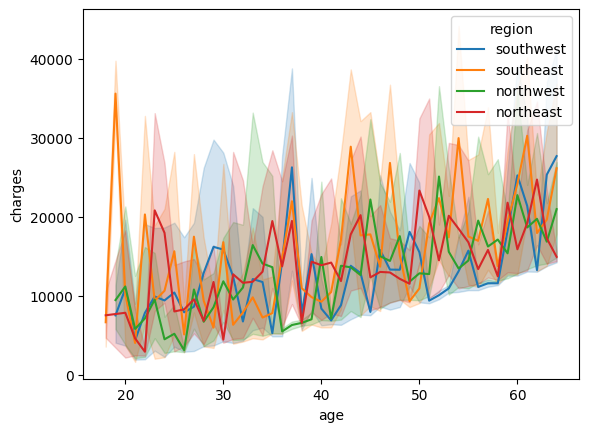

In [ ]:
#Charges by age and region
sns.lineplot(x='age', y='charges', hue='region', data=df)

*We can see that 'charges' for each region are relatively similar, while as age increases, 'charges' are also proportional.

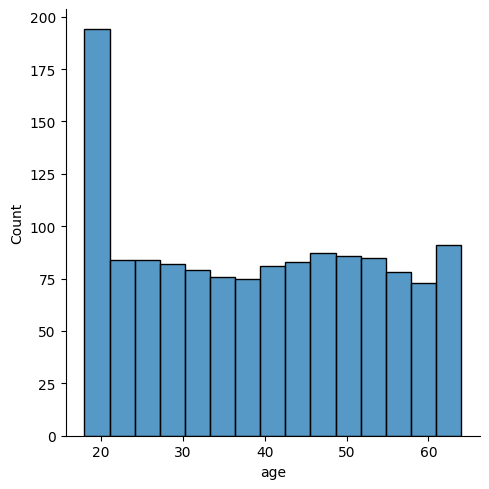

In [ ]:
#distribution of age column
sns.displot(df, x ='age',binwidth=3)



*   Most of customer join insurance program is Young adults at 20 years old
*   Number of customers above 60 is also higher slightly than other ages.
*   The highest number of customer in 20 years old age buy insurance can be explain that because of their young age, they need a channel to save their salary, and insurance is an option














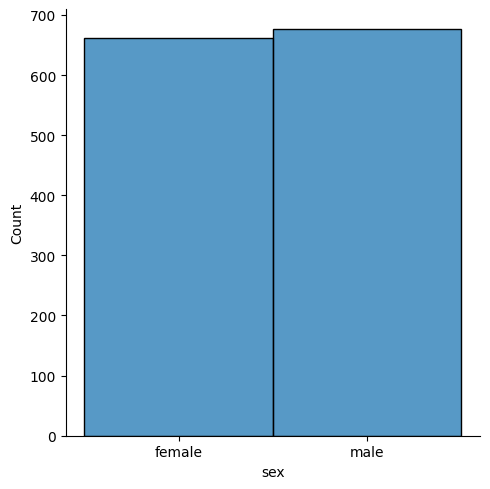

In [ ]:
#Distribution of sex column
sns.displot(df, x='sex', binwidth=3)



*   Number of male customers are approximately equal to number of female customer


*   We can consider an model which dont have this feature because the thing that customer is male or female do not impact the charge.





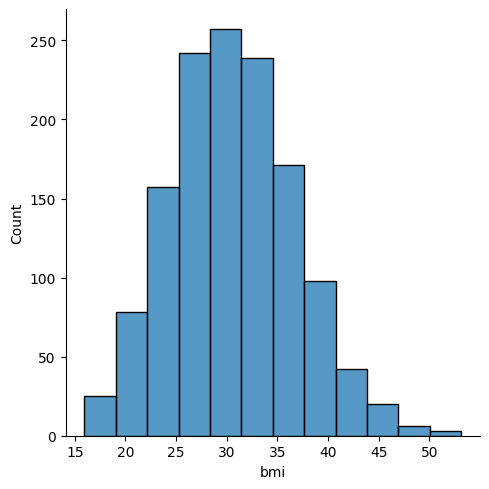

In [ ]:
sns.displot(df, x = 'bmi', binwidth=3)



*   This feature is in normal distribution and may be can not need to modify


*   We can consider this feature as an important feature because it directly related to the customer





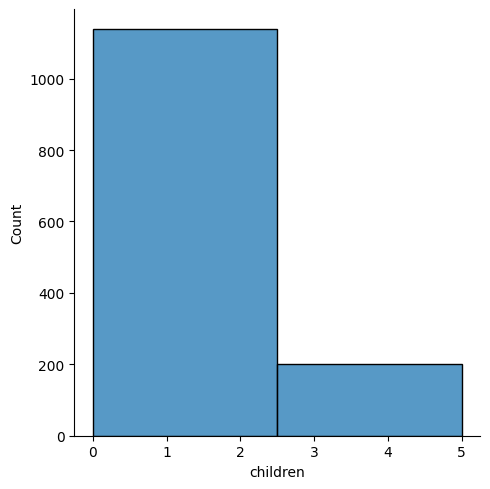

In [ ]:
#Distribution of children feature
sns.displot(df, x = 'children', binwidth=3)

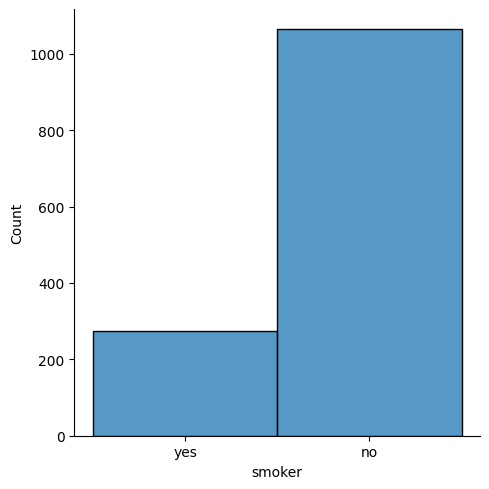

In [ ]:
#distribution of smoker feature
sns.displot(df, x = 'smoker', binwidth=3)



*   It is clear that whether you smoke or not is directly related to your health
*   This can be considered as an important feature besides BMI that must be included in the model



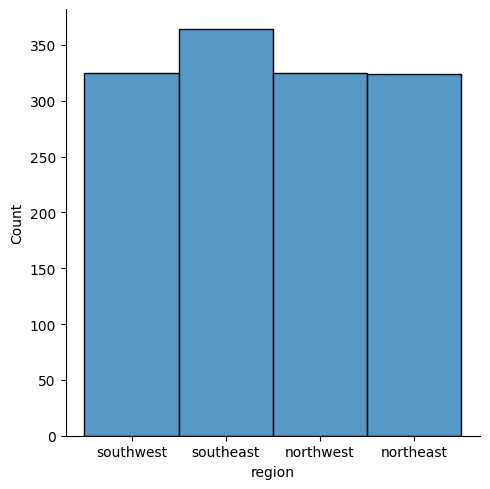

In [ ]:
#Distribution of region feature
sns.displot(df, x = 'region', binwidth=3)

In [ ]:
#replace categorical value with numerical value
df1 = df.copy()
df1['smoker'] = df1['smoker'].replace({'yes':1, 'no':0})
df1['sex'] = df1['sex'].replace({'male':1,'female':0})
df1['region'] = df1['region'].replace({'northeast':1,'northwest':2,'southeast':3,'southwest':4})

Correlation between each features

<Axes: >

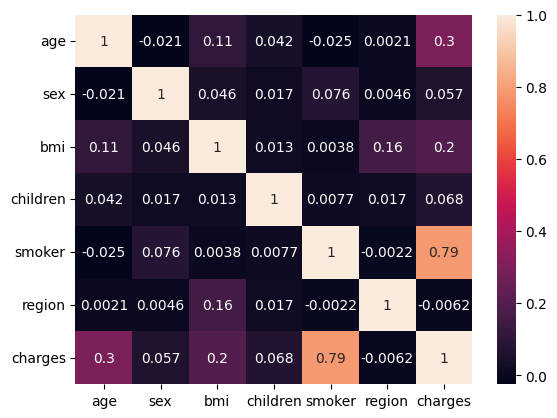

In [ ]:
sns.heatmap(df1.corr(), annot=True)



*   The charges and smoker have relative high correlation, beside 'region' and 'age'
*   'Sex' has the lowest correlation with charges and we can consider to remove that



In [ ]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Scale the data for training

In [ ]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] =scaler.fit_transform(df1[['age', 'sex', 'bmi', 'children', 'smoker', 'region']])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,16884.92400
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,1725.55230
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,4449.46200
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,21984.47061
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,3866.85520


# **Training dataset with basic linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lr = LinearRegression()
x = df1.drop(columns=['charges'])
y = df1['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
print(lr.score(x_test,y_test))

0.7911113876316933


Remove feature 'sex' from the dataframe

In [ ]:
lr = LinearRegression()
x = df1.drop(columns=['charges','sex'])
y = df1['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.7910695570518548

Adding Polynomial Effects

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = df1.drop(columns=['charges'])
y = df1['charges']
pl = PolynomialFeatures(degree=2)
x_trans = pl.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_trans,y,test_size = 0.3, random_state=0)

lr.fit(x_train, y_train)

print(lr.score(x_test, y_test))

0.8744026677132799


*The score is relative high but we still keep to find better model

**Using Regularization Regression**

*Because this dataset have relative low number of features, and each features have correlation with each others so i consider to use ridge regression with L2 regularization to deal with problem

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2)
x = df1.drop(columns=['charges'])
y = df1['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)
ridge.fit(x_train,y_train)

Ridge(alpha=2)

In [ ]:
print(ridge.score(x_test, y_test))

0.7897369554073331


In [ ]:
x = df1.drop(columns=['charges'])
y = df1['charges']
pl = PolynomialFeatures(degree=2)
x_trans = pl.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_trans,y,test_size = 0.3, random_state=0)

ridge.fit(x_train, y_train)

print(ridge.score(x_test, y_test))

0.8678562830561489


*The score does'nt increase  so i keep up with the second model

# **Conclusion**

*From the above results, we can see that a regression model with Polynomial
features with degree=2 and  provides the highest score is 0.8678


*When i remove another categorical feature, such as 'region', its provide much lower score so we should to keep this feature


*When i remove the feature with the lowest correlation with charges(feature 'sex'),the score does not change very much so i dont show to this lab.

# **Insight and Key Findings**



*   From the assignment above, i explored that a dataset with considerable of features with low correlation with target columns still can become a important part of a model
*   The features 'sex' and 'regions' seem to have very low correlation with 'charges', but when they are removed from the model, the accuracy drops significantly.




# **Next steps**

*In the next step, i will try to find another datasets to test quality of my model. Its can be an iterative cycle when i test model on new datasets, inspect the results, adjust model to give better answer, ...
